# ***Zero-Shot***

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing install

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

# ***A Sample Sentiment Prediction***

In [ ]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [ ]:
# printing the predicted rating of the product
int(torch.argmax(result.logits))+1

4

# ***Dataset Description***

In [ ]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.shape
#write code to display percentage of common reviews
df['verified_reviews'].nunique()/df.shape[0]*100

73.01587301587301

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

In [ ]:
df['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [ ]:
#Now let's see some visuals
sns.countplot(x=df['rating'])
plt.show()

NameError: name 'sns' is not defined

# ***Preprocessing***

In [ ]:
import string
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
#Creating a custom function to preprocess text
def preprocess_text(text):
    #Punctuation removal
    words = text.lower().split()
    words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]

    #Stopword removal
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    #Joining the text
    clean_text = ' '.join(words)
    return clean_text

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
#Now you can use the NLTK stopwords dataset in your code.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['text'] = df['verified_reviews'].fillna('').apply(preprocess_text)


In [ ]:
df['text'].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing 4 yr old learns dinosaur control...
4                                                music
Name: text, dtype: object

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
all_words = ' '.join(word for word in df['text'])

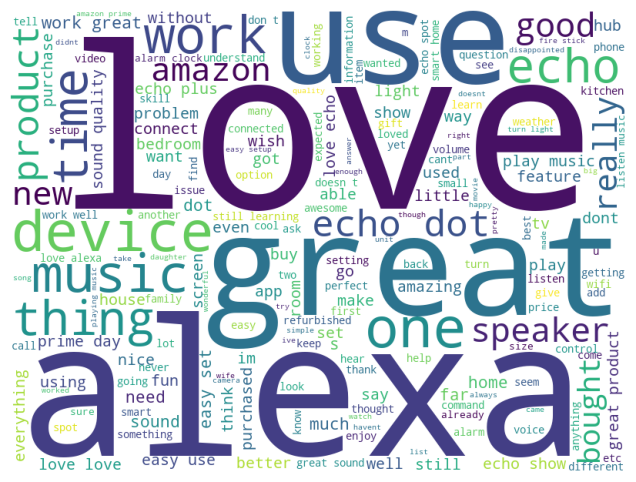

In [ ]:
wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white').generate(all_words)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df['text'].iloc[0]

'love echo'

# ***Sentiment Calculation***

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
df['predicted_sentiment'] = df['text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rating               3150 non-null   int64 
 1   date                 3150 non-null   object
 2   variation            3150 non-null   object
 3   verified_reviews     3149 non-null   object
 4   feedback             3150 non-null   int64 
 5   text                 3150 non-null   object
 6   predicted_sentiment  3150 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 172.4+ KB


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['rating'], df['predicted_sentiment'])
print(f"Accuracy: {round(accuracy*100, 3)} %")

Accuracy: 63.49206349206349 %


In [ ]:
normalized_df = pd.DataFrame()
normalized_df['predicted_sentiment']= (df['predicted_sentiment'] - df['predicted_sentiment'].min()) / (df['predicted_sentiment'].max() - df['predicted_sentiment'].min())
normalized_df['rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
mse = np.mean((normalized_df['predicted_sentiment'] - normalized_df['rating']) ** 2)
print("Mean Squared Error:", round(mse *100, 3) , "%")

Mean Squared Error: 8.363095238095237 %


## **Accuracy:** 63.49206349206349 %

## **Mean Squared Error:** 8.363095238095237 %

# ***Fine-Tuning***

In [ ]:
# defining the URL of the smallBERT model to use
tfhub_handle_encoder = (
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
)

# defining the corresponding preprocessing model for the BERT model above
tfhub_handle_preprocess = (
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
)

print(f"BERT model selected           : {tfhub_handle_encoder}")
print(f"Preprocess model auto-selected: {tfhub_handle_preprocess}")

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess) #Preprocessing model
bert_model = hub.KerasLayer(tfhub_handle_encoder) #BERT model

An example of preprocessing and encoding and how it is done.

In [ ]:
text_test = ["This is such an amazing movie!"]
text_preprocessed = bert_preprocess_model(text_test)

# This print box will help you inspect the keys in the pre-processed dictionary
print(f"Keys       : {list(text_preprocessed.keys())}\n")

# 1. input_word_ids(Token Embedding) is the ids for the words in the tokenized sentence
# Shape = (Batch size, Maxiumum length of sequence: 128 for smallBERT)
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :]}\n')

# 2. input_mask(Padded Embedding) is used so that all input sequences are of same length
# 0 - Invalid token; 1 - Valid token;
print(f'Input Mask : {text_preprocessed["input_mask"][0, :]}\n')

# 3. input_type_ids(Segment Embedding) is the sentence id of the input sentence.
# Shape = (Batch size, Maxiumum length of sequence: 128 for smallBERT)
print(f'Shape      : {text_preprocessed["input_type_ids"].shape}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :]}\n\n')

# Analyzing model outputs
bert_results = bert_model(text_preprocessed)
print(f"Loaded BERT: {tfhub_handle_encoder}")
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']

Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

As you can see, now you have the 3 outputs from the preprocessing that a BERT model would use (`input_words_id`, `input_mask` and `input_type_ids`).

Some other important points:
- The input is truncated to 128 tokens.
- The `input_type_ids` only have one value (0) because this is a single sentence input. For a multiple sentence input, it would have one number for each input.

The text pre-processor is a TensorFlow model. This means that instead of pre-processing separately, we can include it as a layer in the model code.

The BERT models return a map with 3 important keys: `pooled_output`, `sequence_output`, `encoder_outputs`:

- `pooled_output` to represent each input sequence as a whole. The shape is `[batch_size, H]`. You can think of this as an embedding for the entire movie review.
- `sequence_output` represents each input token in the context. The shape is `[batch_size, seq_length, H]`. You can think of this as a contextual embedding for every token in the movie review.
- `encoder_outputs` are the intermediate activations of the `L` Transformer blocks. `outputs["encoder_outputs"][i]` is a Tensor of shape `[batch_size, seq_length, 1024]` with the outputs of the i-th Transformer block, for `0 <= i < L`. The last value of the list is equal to `sequence_output`.

For the fine-tuning we are going to use the `pooled_output` array.

# ***Model builder function***

1. Input Layer
2. Pre-processing Layer
3. Encoder Layer
4. From the BERT output map, using pooled_output
5. Dropout layer
6. Dense layer with softmax activation for 5-class classification

# **`Model Parameters:`**

Given below are the parameters used for the model. They can be changed to see how the model performs with different parameters. Parameters like epochs and learning rate have great impact on the model performance.

In [ ]:
batch_size = 32     # Defining batch-size for the data
dropout_rate = 0.15 # Defining dropout rate for regularization
init_lr = 5e-5      # Defining initial-learning rate for AdamW
epochs = 15

In [ ]:
def build_classifier_model(dropout_rate):

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text") # Input layer

    preprocessing_layer = hub.KerasLayer(
        tfhub_handle_preprocess, name="preprocessing" # Pre-processing layer
    )

    encoder_inputs = preprocessing_layer(text_input) # Using the preprocessed text as encoder input

    encoder = hub.KerasLayer(
        tfhub_handle_encoder, trainable=True, name="BERT_encoder" # Encoder layer
    )

    outputs = encoder(encoder_inputs)
    net = outputs["pooled_output"]
    net = tf.keras.layers.Dropout(dropout_rate)(net) # Dropout Layer for Regularization
    net = tf.keras.layers.Dense(5, activation="Softmax", name="classifier")(net) # Output Layer
    return tf.keras.Model(text_input, net)


# Let's check that the model runs with the output of the preprocessing model.
dropout_rate = dropout_rate
classifier_model = build_classifier_model(dropout_rate)
bert_raw_result = classifier_model(tf.constant(text_test))
print(bert_raw_result)

tf.Tensor([[0.03141022 0.06112255 0.15763178 0.2386407  0.5111948 ]], shape=(1, 5), dtype=float32)


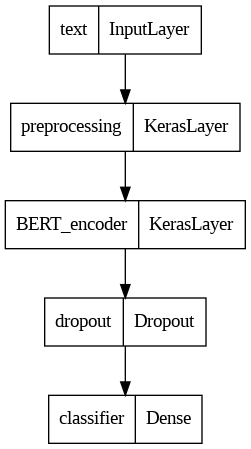

In [ ]:
tf.keras.utils.plot_model(classifier_model)

# ***Losses and Metrics***

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy()

# ***Data-Split***

Data is split into train and test sets. The model is trained on the train set and evaluated on the test set. The loss function used is `categorical_crossentropy` and the metric used is `categorical_accuracy`.


In [ ]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df['text'] = df['verified_reviews'].fillna('') #Filling the null values with empty string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   text              3150 non-null   object
dtypes: int64(2), object(4)
memory usage: 147.8+ KB


In [ ]:
from sklearn.model_selection import train_test_split
AUTOTUNE = tf.data.AUTOTUNE

# Define features and labels
features = df['text']
labels = df['rating'].astype(int)  # Convert labels to integers

# First split the data into a training set and a temporary set using an 80-20 split
train_features, temp_features, train_labels, temp_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Then split the temporary set into a validation (cross) set and a test set using a 50-50 split
cross_features, test_features, cross_labels, test_labels = train_test_split(temp_features, temp_labels, test_size=0.5, random_state=42)

# Create datasets
train_ds = (train_features, train_labels)
cross_ds = (cross_features, cross_labels)
test_ds = (test_features, test_labels)

# One-hot encoding of labels (since we have used 'Categorical Cross-Entropy' and not 'Sparse Categorical Cross-Entropy')
train_labels = pd.get_dummies(train_labels)
cross_labels = pd.get_dummies(cross_labels)
test_labels = pd.get_dummies(test_labels)

train_ds = tf.data.Dataset.from_tensor_slices((train_features.values, train_labels.values)) #converts the dataset into a tf.data.Dataset object
train_ds = train_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE) #caches the dataset to memory to get a speedup while reading from it.

cross_ds = tf.data.Dataset.from_tensor_slices((cross_features.values, cross_labels.values)) #converts the dataset into a tf.data.Dataset object
cross_ds = cross_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE) #caches the dataset to memory to get a speedup while reading from it.

test_ds = tf.data.Dataset.from_tensor_slices((test_features.values, test_labels.values)) #converts the dataset into a tf.data.Dataset object
test_ds = test_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE) #caches the dataset to memory to get a speedup while reading from it.

# ***Optimizer***

For fine-tuning, let's use the same optimizer that BERT was originally trained with: the "Adaptive Moments" (Adam). This optimizer minimizes the prediction loss and does regularization by weight decay (not using moments), which is also known as [AdamW](https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/AdamW).

In the past, the Adam optimizer was used which is a popular choice. AdamW is a new optimizier which is meant to improve generalization. The intuition and algorithm behind AdamW can be found in this paper [here](https://arxiv.org/abs/1711.05101).

For the learning rate (`init_lr`), we use the same schedule as BERT pre-training: linear decay of a notional initial learning rate, prefixed with a linear warm-up phase over the first 10% of training steps (`num_warmup_steps`). In line with the BERT paper, the initial learning rate is smaller for fine-tuning (best of 5e-5, 3e-5, 2e-5).

In [ ]:
!pip install tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.4 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=fec0de2667fa6da8d23e44d47edaa70eab36dcdfa10d5da20e4b784f535eecd9
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
from official.nlp import optimization

In [ ]:
epochs = epochs
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

init_lr = init_lr
optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type="adamw", # using the AdamW optimizer type
)

# ***Compiling it all together...***

In [ ]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
print(f"Training model with {tfhub_handle_encoder}")
history_1lr = classifier_model.fit(
    x=train_ds, validation_data = cross_ds, epochs=epochs
)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/15
79/79 [==============================] - 789s 10s/step - loss: 0.9265 - categorical_accuracy: 0.7040 - val_loss: 0.8683 - val_categorical_accuracy: 0.7048
Epoch 2/15
79/79 [==============================] - 718s 9s/step - loss: 0.7092 - categorical_accuracy: 0.7468 - val_loss: 0.7336 - val_categorical_accuracy: 0.7365
Epoch 3/15
79/79 [==============================] - 711s 9s/step - loss: 0.5477 - categorical_accuracy: 0.8016 - val_loss: 0.7425 - val_categorical_accuracy: 0.7746
Epoch 4/15
79/79 [==============================] - 723s 9s/step - loss: 0.4012 - categorical_accuracy: 0.8528 - val_loss: 0.7517 - val_categorical_accuracy: 0.7556
Epoch 5/15
79/79 [==============================] - 708s 9s/step - loss: 0.3087 - categorical_accuracy: 0.8925 - val_loss: 0.7877 - val_categorical_accuracy: 0.7841
Epoch 6/15
79/79 [==============================] - 706s 9s/step - loss: 0.2324 - 

In [ ]:
loss_l, accuracy = classifier_model.evaluate(test_ds)
print(f"Loss: {loss_l}")
print(f"Accuracy: {accuracy}")

In [ ]:
history_dict = history_1lr.history
print(history_dict.keys())

In [ ]:
with open(f'history_values_{init_lr}.txt', 'w') as f: # storing model training history into a text file
    for key in history_dict.keys():
        f.write(str(key) + '\n')
        for value in history_dict[key]:
            f.write(str(round(value, 3)) + '\n')
        f.write('\n')

# ***Plotting Results***

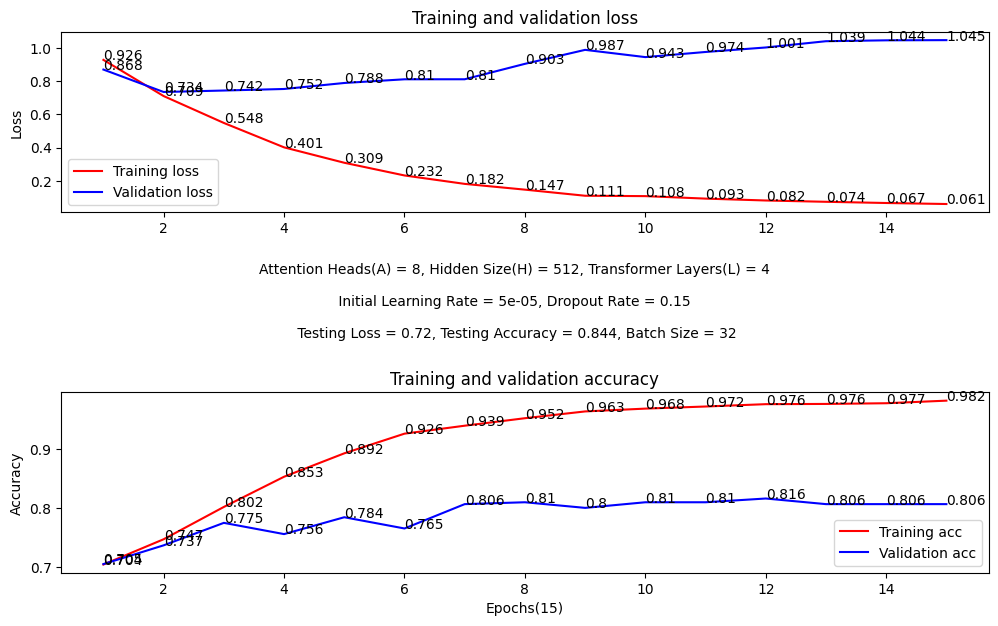

In [ ]:
num_attention_heads = 8
num_hidden_layers = 512
L_value = 4

acc = history_dict["categorical_accuracy"]
val_acc = history_dict["val_categorical_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
fig.tight_layout()

ax[0].plot(epochs, loss, "r", label="Training loss")
ax[0].plot(epochs, val_loss, "b", label="Validation loss")
ax[0].set_title("Training and validation loss")
ax[0].set_ylabel("Loss")
ax[0].legend()

for i, j in zip(epochs, loss):
    ax[0].text(i, j, str(round(j, 3)))

for i, j in zip(epochs, val_loss):
    ax[0].text(i, j, str(round(j, 3)))

ax[1].plot(epochs, acc, "r", label="Training acc")
ax[1].plot(epochs, val_acc, "b", label="Validation acc")
ax[1].set_title("Training and validation accuracy")
total_epochs = len(acc)
ax[1].set_xlabel(f"Epochs({total_epochs})")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc="lower right")

for i, j in zip(epochs, acc):
    ax[1].text(i, j, str(round(j, 3)))

for i, j in zip(epochs, val_acc):
    ax[1].text(i, j, str(round(j, 3)))

fig.suptitle(f'Attention Heads(A) = {num_attention_heads}, Hidden Size(H) = {num_hidden_layers}, Transformer Layers(L) = {L_value}\n\n Initial Learning Rate = {init_lr}, Dropout Rate = {dropout_rate} \n\n Testing Loss = {round(loss_l, 3)}, Testing Accuracy = {round(accuracy, 3)}, Batch Size = {batch_size}', fontsize=10, y=0.582)
plt.subplots_adjust(hspace = 1.0)